In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
from pandas.tseries.offsets import MonthEnd

C:\Users\Harrison\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
trends = pd.read_csv("test.csv", header=0, parse_dates=[0], index_col=0, squeeze=True) #want datetimeindex
trends
trends.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2004-01-01 to 2020-01-01
Columns: 981 entries, us to robot
dtypes: int64(981)
memory usage: 1.4 MB


In [3]:
#move back one day since our asset data is end of month
trends.index = pd.to_datetime(trends.index, format="%Y%m") + MonthEnd(-1) 
trends
trends.to_csv("updated_gtrends.csv")

,us,says,trade,billion,new,china,ceo,deal,coronavirus,shares,...,probes,sap,line,warner,reality,toyota,galaxy,computer,ubers,robot
2003-12-31,79,24,92,37,100,80,47,43,0,74,...,100,88,88,100,88,83,5,100,11,45
2004-01-31,78,26,100,39,86,86,51,43,0,76,...,100,91,84,88,100,81,5,95,0,43
2004-02-29,75,23,93,34,85,88,49,44,0,71,...,91,88,86,84,92,84,5,88,0,51
2004-03-31,78,23,87,37,85,87,52,42,0,71,...,77,90,85,86,93,83,5,84,0,43
2004-04-30,76,24,85,38,84,86,47,43,0,62,...,78,91,83,82,93,85,5,81,9,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,70,85,64,77,67,66,94,66,0,67,...,14,80,64,17,48,100,31,23,54,54
2019-09-30,48,88,63,64,65,70,94,69,0,69,...,15,81,63,17,48,83,29,21,57,61
2019-10-31,47,86,56,61,65,64,94,76,0,70,...,14,78,61,16,48,82,30,21,55,69
2019-11-30,46,89,54,60,79,61,87,68,0,64,...,12,70,59,16,49,80,31,21,70,71


In [4]:
start = datetime.datetime(2003, 11, 1)
end = datetime.datetime(2020, 12, 31)
names = ['IVV']
stocks = pdr.DataReader(names, 'yahoo', start,end)['Adj Close'].resample('M').last()

In [ ]:
stocks.info()

In [5]:
df = pd.DataFrame()
df["Market Return"] = stocks[names[0]].pct_change()
df = df.shift(1)
df['target_return'] = df['Market Return'].shift(-1)
df = df.dropna()



In [ ]:
df.info()
trends.info()


In [6]:
data = pd.concat([df, trends], axis = 1)

In [7]:
data = data.dropna()


In [8]:
data

,Market Return,target_return,us,says,trade,billion,new,china,ceo,deal,...,probes,sap,line,warner,reality,toyota,galaxy,computer,ubers,robot
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-31,0.052328,0.021489,78.0,26.0,100.0,39.0,86.0,86.0,51.0,43.0,...,100.0,91.0,84.0,88.0,100.0,81.0,5.0,95.0,0.0,43.0
2004-02-29,0.021489,0.012587,75.0,23.0,93.0,34.0,85.0,88.0,49.0,44.0,...,91.0,88.0,86.0,84.0,92.0,84.0,5.0,88.0,0.0,51.0
2004-03-31,0.012587,-0.012287,78.0,23.0,87.0,37.0,85.0,87.0,52.0,42.0,...,77.0,90.0,85.0,86.0,93.0,83.0,5.0,84.0,0.0,43.0
2004-04-30,-0.012287,-0.018723,76.0,24.0,85.0,38.0,84.0,86.0,47.0,43.0,...,78.0,91.0,83.0,82.0,93.0,85.0,5.0,81.0,9.0,43.0
2004-05-31,-0.018723,0.016740,78.0,24.0,82.0,37.0,86.0,81.0,45.0,42.0,...,78.0,100.0,83.0,83.0,84.0,85.0,5.0,82.0,0.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.015199,-0.016576,70.0,85.0,64.0,77.0,67.0,66.0,94.0,66.0,...,14.0,80.0,64.0,17.0,48.0,100.0,31.0,23.0,54.0,54.0
2019-09-30,-0.016576,0.019459,48.0,88.0,63.0,64.0,65.0,70.0,94.0,69.0,...,15.0,81.0,63.0,17.0,48.0,83.0,29.0,21.0,57.0,61.0
2019-10-31,0.019459,0.021607,47.0,86.0,56.0,61.0,65.0,64.0,94.0,76.0,...,14.0,78.0,61.0,16.0,48.0,82.0,30.0,21.0,55.0,69.0


In [9]:
#define sets
train_set = data.iloc[0:60].copy() #train first year
verify_set = data.iloc[61:].copy() #verify year 11 through 15
#test_set = asset_data.iloc[121:].copy() #test post year 10

In [10]:
X = train_set.drop(['target_return'],axis=1).copy()
Y1 = train_set['target_return'].copy()


X_verify = verify_set.drop(['target_return'],axis=1).copy()
Y1_verify = verify_set['target_return'].copy()


#X_test = test_set.drop(['target_return'],axis=1).copy()
#Y1_test = test_set['target_return'].copy()


In [15]:
# Standardize the features

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

scaler = StandardScaler().fit(X) #automatically standardizes to a normal
scaled_X = StandardScaler().fit_transform(X)
scaled_X_verify = scaler.transform(X_verify)
#scaled_X_test = scaler.transform(X_test)

X_tr = pd.DataFrame(scaled_X,columns=X.columns, index=X.index)
X_ve = pd.DataFrame(scaled_X_verify,columns=X_verify.columns, index=X_verify.index)
#X_te = pd.DataFrame(scaled_X_test,columns=X_test.columns, index=X_test.index)




                    OLS     RIDGE  LASS0  ENET
Market Return -0.000686 -0.000708   -0.0  -0.0
us            -0.000435 -0.000441    0.0  -0.0
says          -0.000266 -0.000265   -0.0  -0.0
trade         -0.000251 -0.000205    0.0   0.0
billion        0.000648  0.000659    0.0   0.0
...                 ...       ...    ...   ...
toyota         0.000450  0.000449    0.0   0.0
galaxy        -0.000733 -0.000731   -0.0  -0.0
computer       0.000087  0.000089    0.0   0.0
ubers         -0.000175 -0.000172   -0.0  -0.0
robot         -0.000074 -0.000069   -0.0  -0.0

[982 rows x 4 columns]


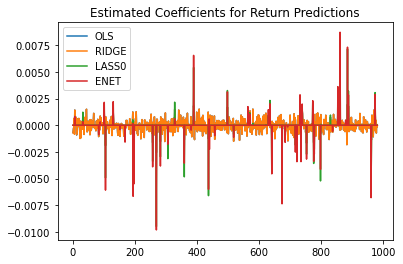

In [16]:
# Forecast returns

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

alpha_0 = 0.001
l1 = 0.7
Y = Y1
regr = linear_model.LinearRegression()
regr.fit(X_tr, Y)
print('')
ridge = Ridge(alpha = alpha_0,max_iter=10000)
ridge.fit(X_tr,Y)
print('')
lasso = Lasso(alpha = alpha_0,max_iter=10000)
lasso.fit(X_tr,Y)
print('')
enet = ElasticNet(alpha_0, l1_ratio=l1,max_iter=10000)
enet.fit(X_tr,Y)



coeffs = pd.DataFrame(regr.coef_,X_tr.columns)
coeffs.columns=['OLS']
coeffs['RIDGE'] = ridge.coef_
coeffs['LASS0'] = lasso.coef_
coeffs['ENET'] = enet.coef_
temp = coeffs.plot(use_index=False)
temp = plt.title('Estimated Coefficients for Return Predictions')
print(coeffs)

in sample performance
OLS
Mean squared error: 0.00
Coefficient of determination: 1.00
Lasso
Mean squared error: 0.00
Coefficient of determination: 0.94
Ridge
Mean squared error: 0.00
Coefficient of determination: 1.00
ENET
Mean squared error: 0.00
Coefficient of determination: 0.96
out of sample performance
OLS
Mean squared error: 1.02
Coefficient of determination: -702.60
Lasso
Mean squared error: 1.87
Coefficient of determination: -1284.65
Ridge
Mean squared error: 1.02
Coefficient of determination: -700.84
ENET
Mean squared error: 1.94
Coefficient of determination: -1332.15


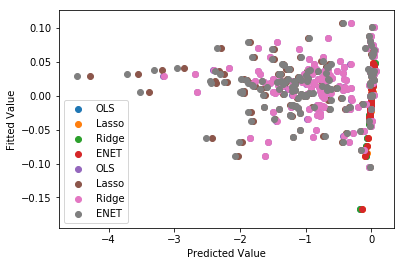

In [14]:
from sklearn.metrics import mean_squared_error, r2_score




def oos(outcome, predictor,name):
    print(name)
    print('Mean squared error: %.2f'
      % mean_squared_error(outcome,predictor))
    print('Coefficient of determination: %.2f'
      % r2_score(outcome, predictor))
    plt.scatter(predictor,outcome,label=name)

#insample performance
print("in sample performance")
return_pred = regr.predict(X_tr)

oos(Y1,regr.predict(X_tr),'OLS')
oos(Y1,lasso.predict(X_tr),'Lasso')
oos(Y1,ridge.predict(X_tr),'Ridge')

oos(Y1,enet.predict(X_tr),"ENET")
temp = plt.xlabel('Predicted Value')
temp = plt.ylabel('Fitted Value')
temp = plt.legend()

# fit the model
print("out of sample performance")
return_pred = regr.predict(X_ve)

oos(Y1_verify,regr.predict(X_ve),'OLS')
oos(Y1_verify,lasso.predict(X_ve),'Lasso')
oos(Y1_verify,ridge.predict(X_ve),'Ridge')

oos(Y1_verify,enet.predict(X_ve),"ENET")
temp = plt.xlabel('Predicted Value')
temp = plt.ylabel('Fitted Value')
temp = plt.legend()